<a href="https://colab.research.google.com/github/m-nosrati/Twitter-Sentiment-Analysis-using-NLTK/blob/main/Twitter_Sentiment_Analysis_Using_LSTM_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Twetter Text Classification with LSTM using TensorFlow 2.0

## 1.  Importing packages and libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import nltk
import re

from nltk.corpus import stopwords
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/Thinkful/Data/train.csv' )
test_df=pd.read_csv('/content/drive/MyDrive/Thinkful/Data/test.csv' )

In [ ]:
train_df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
test_df.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


## Read Dataset
In this notebook, I am using tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc. source of dataset

It contains a test and train dataset. Dataset details:

#Test dataset:

ID: The id of the tweet (9873)

tweet : the text of the tweet (Most viewed this week)

#train dataset:

ID: The id of the tweet (9873)

label: 0-positive and 1-negative

tweet : the text of the tweet (Most viewed this week)


In [ ]:
train_df.shape

(7920, 3)

In [ ]:
test_df.shape

(1953, 2)

In [ ]:
###Drop Nan Values
train_df=train_df.dropna()

In [ ]:
train_df.shape

(7920, 3)

In [ ]:
test_df=test_df.dropna()

In [ ]:
test_df.shape

(1953, 2)

In [ ]:
## Get the Independent Features

X=train_df.drop('label',axis=1)

In [ ]:
X.shape

(7920, 2)

In [ ]:
## Get the Dependent features
y=train_df['label']

In [ ]:
y.shape

(7920,)

## Data preprocessing

## Defining the vocabulary size 

Vocabulary size is a big deal with language modeling. A smaller vocabulary results in a smaller model that trains faster.

In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
messages=X.copy()

In [ ]:
messages['tweet'][1]

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'

In [ ]:
messages.reset_index(inplace=True)

## 
Model Accuracy depends on how well the text is cleaned before training any mode
Some of the common text preprocessing / cleaning steps are:
Most of the text data are cleaned by following below steps.


Tokenization - Converting a sentence into list of words

Remove stopwords

Stemming - Tranforming any form of a word to its root word

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

### Dataset Preprocessing
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['tweet'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109

## Check the corpus to see how clean it is. 

In [ ]:
corpus

['fingerprint pregnanc test http goo gl h mfqv android app beauti cute health iger iphoneonli iphonesia iphon',
 'final transpar silicon case thank uncl yay soni xperia sonyexperia http instagram com p yget jc jm',
 'love would go talk makememori unplug relax iphon smartphon wifi connect http fb n lsupcu',
 'wire know georg made way iphon cute daventri home http instagr p li uj k',
 'amaz servic appl even talk question unless pay stupid support',
 'iphon softwar updat fuck phone big time stupid iphon',
 'happi us instap instadaili us soni xperia xperiaz http instagram com p z qgfwlvj',
 'new type c charger cabl uk http www ebay co uk itm bay amazon etsi new year rob cross tobi young evemun mcmafia taylor spectr newyear start recip technolog samsunggalaxi iphonex pic twitter com pjiwq wtc',
 'bout go shop listen music iphon justm music likeforlik followforfollow http instagr p vj bg tlql',
 'photo fun selfi pool water soni camera picoftheday sun instagood boy cute outdoor http tmblr co 

## One-hot Encoding

 One-hot Encoding is a type of vector representation in which all of the elements in a vector are 0, except for one, which has 1 as its value, where 1 represents a boolean specifying a category of the element.

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[1886,
  3722,
  3650,
  2642,
  638,
  190,
  1329,
  1583,
  4559,
  4313,
  1124,
  4488,
  1962,
  3416,
  240,
  2124,
  2010],
 [4441,
  956,
  681,
  4335,
  477,
  1393,
  820,
  1526,
  98,
  423,
  2642,
  930,
  4421,
  4134,
  654,
  1190,
  4805],
 [4334,
  4477,
  2420,
  1035,
  1081,
  878,
  3589,
  2010,
  1488,
  2823,
  1011,
  2642,
  240,
  735,
  4869],
 [4471,
  3516,
  2835,
  4353,
  2329,
  2010,
  4488,
  3885,
  4157,
  2642,
  1066,
  4134,
  1148,
  2476,
  3275],
 [4934, 2945, 1424, 1916, 1035, 2424, 3985, 3323, 1261, 2658],
 [2010, 21, 1803, 724, 3241, 2421, 2150, 1261, 2010],
 [1234,
  3882,
  834,
  1838,
  3882,
  1526,
  98,
  4633,
  2642,
  930,
  4421,
  4134,
  195,
  1108],
 [230,
  123,
  3677,
  4908,
  4144,
  2670,
  2642,
  1264,
  1598,
  3438,
  2670,
  2636,
  4516,
  3299,
  3424,
  230,
  4147,
  3594,
  4979,
  2560,
  464,
  4557,
  965,
  4967,
  4781,
  1018,
  2867,
  1253,
  3088,
  3720,
  3823,
  4441,
  1055,
  4421,
  1068,

## Embedding Representation

A word embedding is a learned representation for text where words that have the same meaning have a similar representation.

Word embeddings are in fact a class of techniques where individual words are represented as real-valued vectors in a predefined vector space. Each word is mapped to one vector and the vector values are learned in a way that resembles a neural network, and hence the technique is often lumped into the field of deep learning.

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  240 2124 2010]
 [   0    0    0 ...  654 1190 4805]
 [   0    0    0 ...  240  735 4869]
 ...
 [   0    0    0 ... 1825  559 2733]
 [   0    0 4441 ... 1401  477 3378]
 [   0    0    0 ... 4421 4134 3355]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0, 1886, 3722, 3650, 2642,  638,  190, 1329, 1583,
       4559, 4313, 1124, 4488, 1962, 3416,  240, 2124, 2010], dtype=int32)

## LSTM Networks
Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work. They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way. For more details click [here](https://https://colah.github.io/posts/2015-08-Understanding-LSTMs/).


In [ ]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


## Now, I fit my model on training set and check the accuracy on validation set.

In [ ]:
len(embedded_docs),y.shape

(7920, (7920,))

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((7920, 20), (7920,))

## Model Training, Evaluation and Prediction

Training sets are used to fit and tune the models. Test sets are put aside as "unseen" data to evaluate the models.


The data should be always split into train and test sets before doing anything else.  
This is the best way to get reliable estimates of your models’ performance.
After splitting the data, we don’t touch our test set until we’re ready to choose our final model!
Comparing test vs. training performance allows us to avoid overfitting... If the model performs very well on the training data but poorly on the test data, then it’s overfit.For more details click [here](https://https://elitedatascience.com/model-training). 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

## Training History in Keras
You can learn a lot about the behavior of your model by reviewing its performance over time.

LSTM models are trained by calling the fit() function. This function returns a variable called history that contains a trace of the loss and any other metrics specified during the compilation of the model. These scores are recorded at the end of each epoch.

The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.
The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
99/99 [==============================] - 3s 11ms/step - loss: 0.4830 - accuracy: 0.7900 - val_loss: 0.2547 - val_accuracy: 0.8813
Epoch 2/10
99/99 [==============================] - 1s 5ms/step - loss: 0.2307 - accuracy: 0.9034 - val_loss: 0.2408 - val_accuracy: 0.8958
Epoch 3/10
99/99 [==============================] - 1s 5ms/step - loss: 0.1550 - accuracy: 0.9402 - val_loss: 0.2700 - val_accuracy: 0.8895
Epoch 4/10
99/99 [==============================] - 1s 5ms/step - loss: 0.1029 - accuracy: 0.9640 - val_loss: 0.3510 - val_accuracy: 0.8750
Epoch 5/10
99/99 [==============================] - 1s 5ms/step - loss: 0.0905 - accuracy: 0.9706 - val_loss: 0.3850 - val_accuracy: 0.8750
Epoch 6/10
99/99 [==============================] - 1s 5ms/step - loss: 0.0717 - accuracy: 0.9801 - val_loss: 0.5149 - val_accuracy: 0.8718
Epoch 7/10
99/99 [==============================] - 1s 5ms/step - loss: 0.0565 - accuracy: 0.9829 - val_loss: 0.5819 - val_accuracy: 0.8636
Epoch 8/10
99/99 [=

In [ ]:
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

## Performance Metrics And Accuracy

## Metrics

The leaderboard is based on Mean F-Score which can be implemented with Macro Average F1 Score. However, it won't be very informative without Accuracy, Precision and Recall because classes are almost balanced and it is hard to tell which class is harder to predict.

Accuracy measures the fraction of the total sample that is correctly identified
Precision measures that out of all the examples predicted as positive, how many are actually positive.

Recall measures that out of all the actual positives, how many examples were correctly classified as positive by the model.

F1 Score is the harmonic mean of the Precision and Recall.

Keras has accuracy in its metrics module, but doesn't have rest of the metrics stated above.

 Another crucial point is Precision, Recall and F1-Score are global metrics so they should be calculated on whole training or validation set. Computing them on every batch would be both misleading and ineffective in terms of execution time. 
 
 ClassificationReport which is similar to sklearn.metrics.classification_report, computes those metrics after every epoch for the given training and validation set.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1031,  121],
       [ 108,  324]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8554292929292929

The accuracy of the model is around 86%. 

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

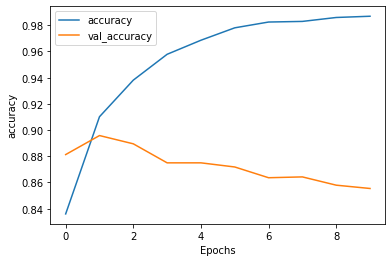

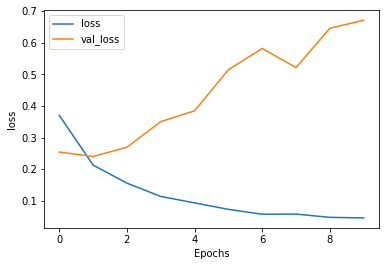

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Now, for the results I achieved this way, the accuracy, both training and validation, is around 86%

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1152
           1       0.73      0.75      0.74       432

    accuracy                           0.86      1584
   macro avg       0.82      0.82      0.82      1584
weighted avg       0.86      0.86      0.86      1584



According to the classification report, the accuracy of the model is 86%. The other metrics are calculated to compare models and pick the best performing model.